Caitlin Lindsay Chosen Dataset: Abalone (https://archive.ics.uci.edu/dataset/1/abalone) - regression problem

In [7]:
!pip install ucimlrepo

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [4]:
#Import dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X = abalone.data.features
y = abalone.data.targets 
  
# metadata 
#print(abalone.metadata) 
print("\n")  
# variable information 
print(abalone.variables) 



             name     role         type demographic  \
0             Sex  Feature  Categorical        None   
1          Length  Feature   Continuous        None   
2        Diameter  Feature   Continuous        None   
3          Height  Feature   Continuous        None   
4    Whole_weight  Feature   Continuous        None   
5  Shucked_weight  Feature   Continuous        None   
6  Viscera_weight  Feature   Continuous        None   
7    Shell_weight  Feature   Continuous        None   
8           Rings   Target      Integer        None   

                   description  units missing_values  
0         M, F, and I (infant)   None             no  
1    Longest shell measurement     mm             no  
2      perpendicular to length     mm             no  
3           with meat in shell     mm             no  
4                whole abalone  grams             no  
5               weight of meat  grams             no  
6  gut weight (after bleeding)  grams             no  
7      

$\textbf{TASK: Take 10 moderately sized subsamples your dataset and create a correlation plot for each subsample}$

In [5]:
X = abalone.data.features
y = abalone.data.targets
df = X.copy()
df['Rings'] = y.Rings

print(df.head())

  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


In [ ]:
label_encoder = LabelEncoder()
df['Sex_encoded'] = label_encoder.fit_transform(df['Sex'])
df.drop('Sex', axis=1, inplace=True)
print(df.head())

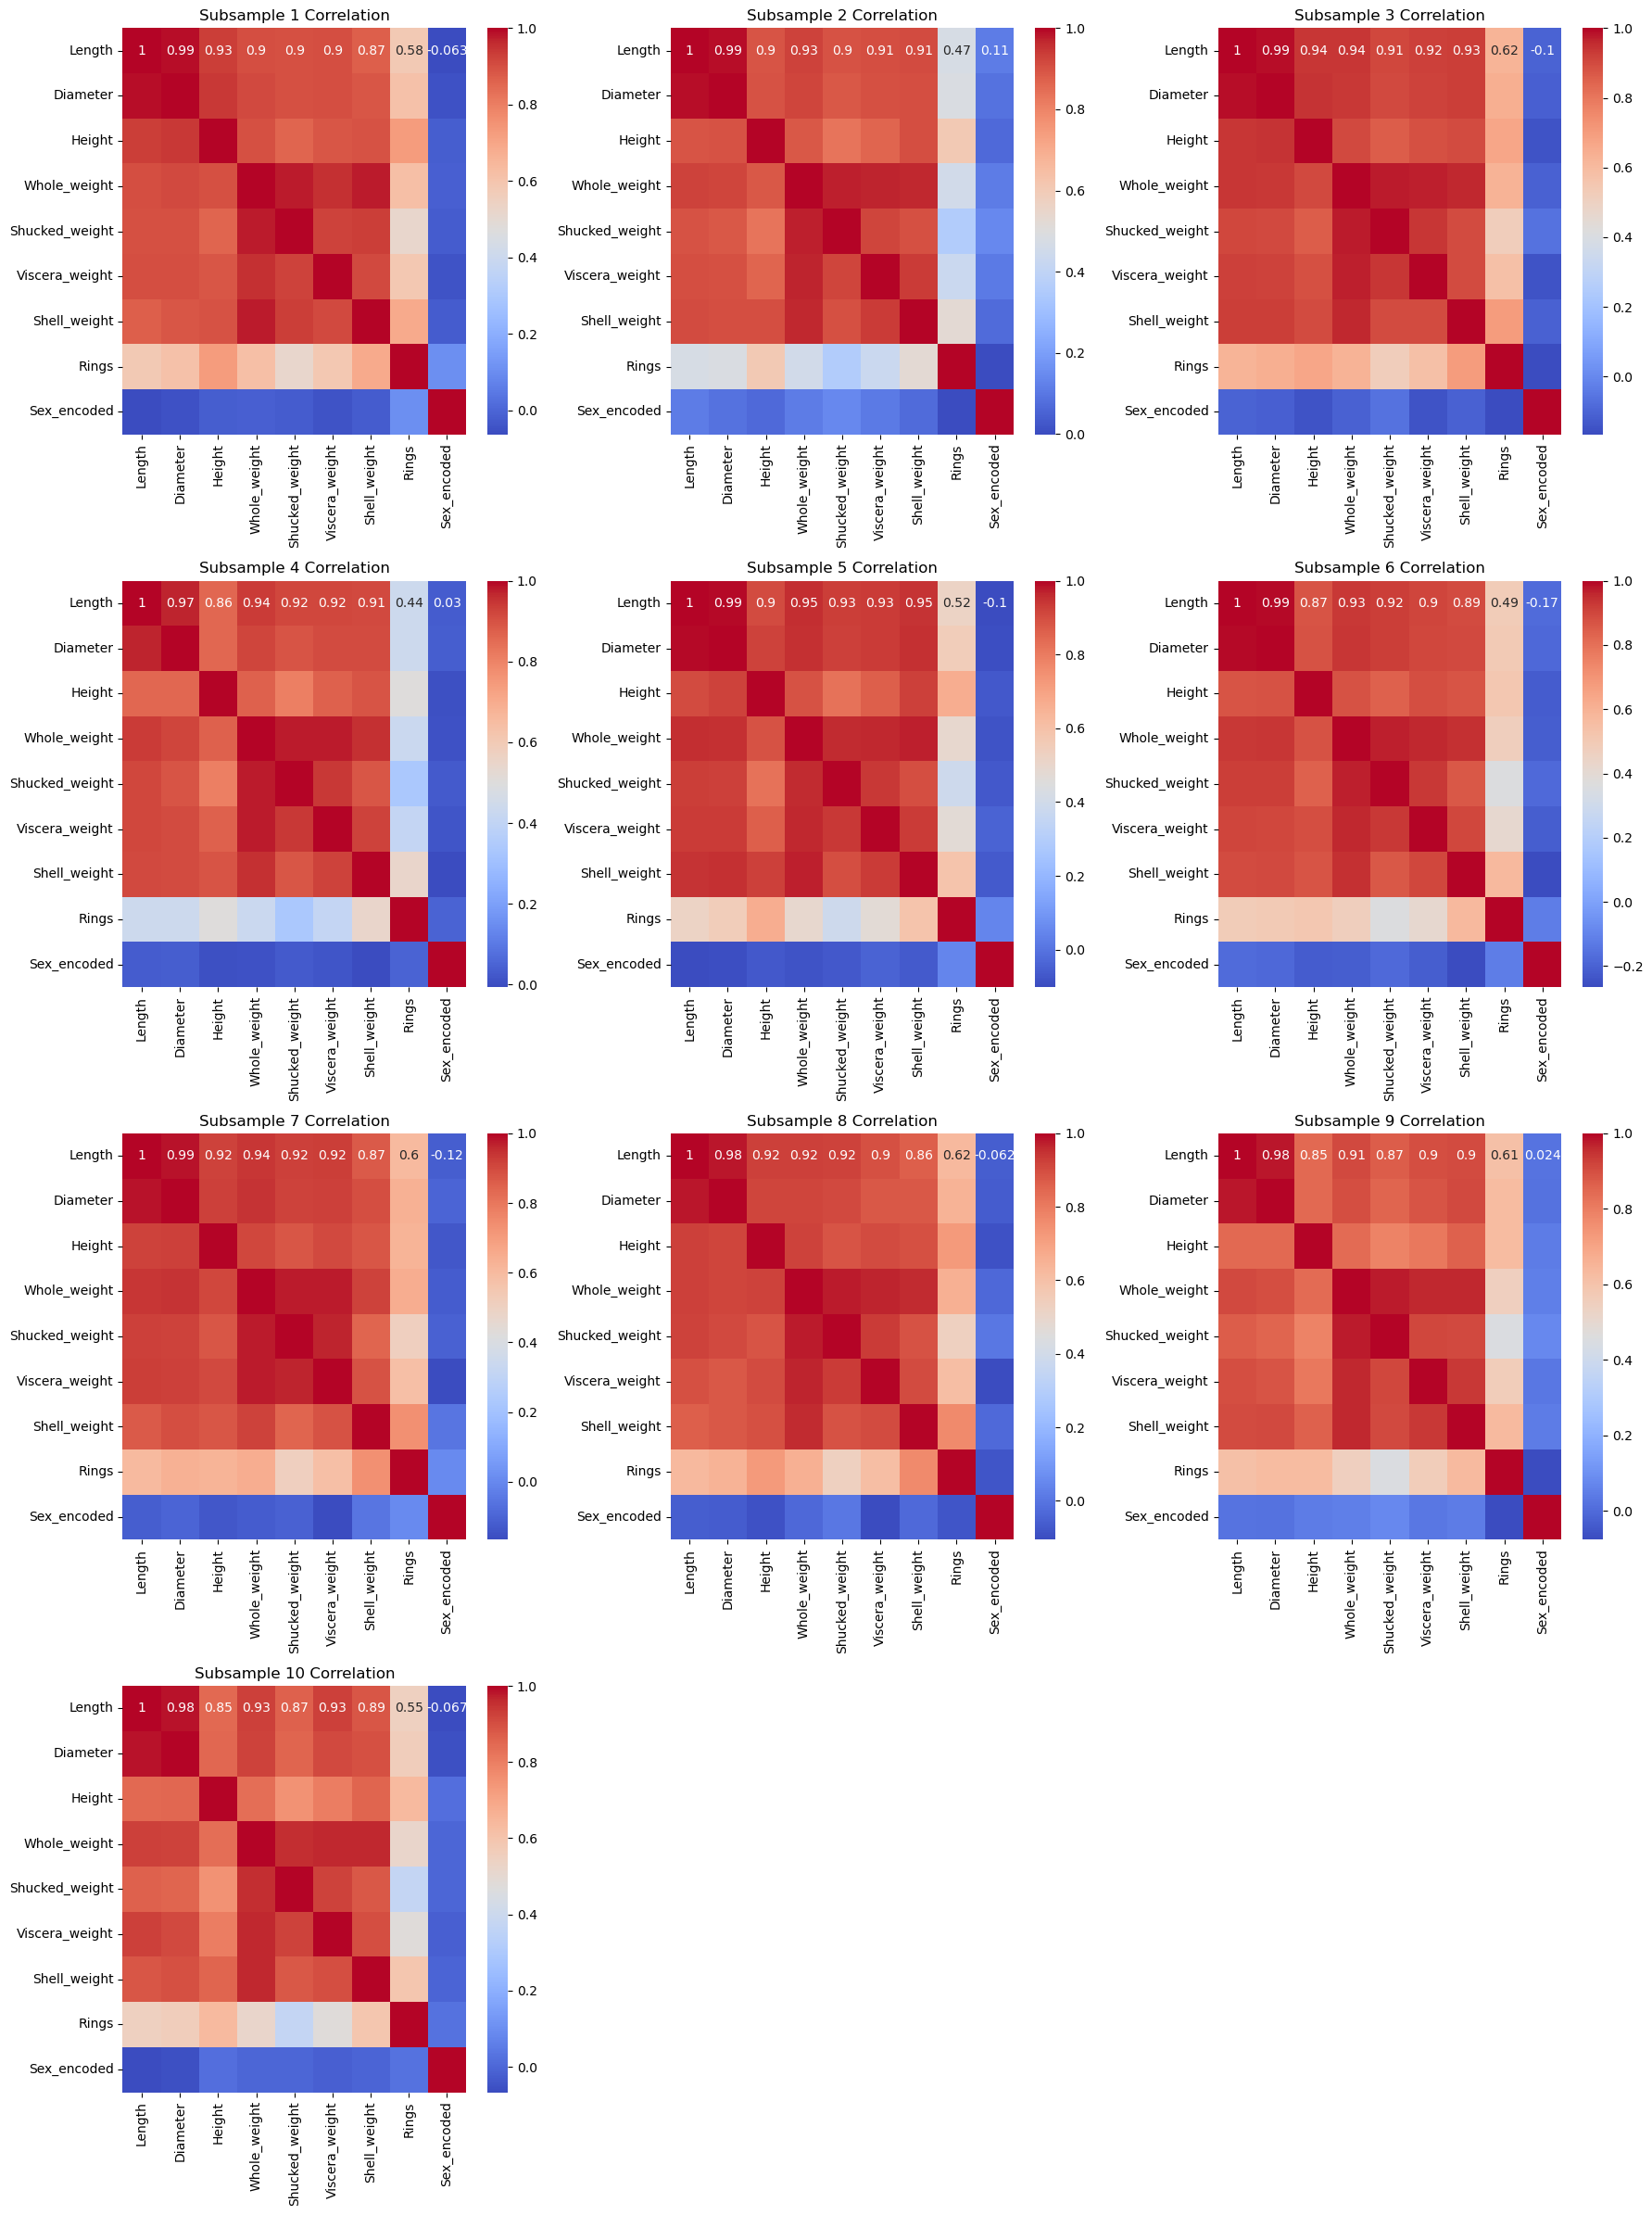

In [11]:
fig, axes = plt.subplots(4, 3, figsize=(18, 24))
axes = axes.ravel()

for i in range(10):
    subsample = df.sample(n=100, random_state=i)  # Taking a subsample of 100 instances
    corr_matrix = subsample.corr()
    sns.heatmap(corr_matrix, ax=axes[i], cmap='coolwarm', annot=True)
    axes[i].set_title(f'Subsample {i+1} Correlation')
    
for j in range(i+1, 12):
    axes[j].set_visible(False)
    
plt.tight_layout()
plt.show()

$\textbf{TASK (Classification): If your problem is a classification problem visually check if the target variable is imbalanced }$<br>
$\textbf{TASK(Regression): If your problem is a regression problem visually the distribution of your target variabe}$

C:\Users\Cait\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


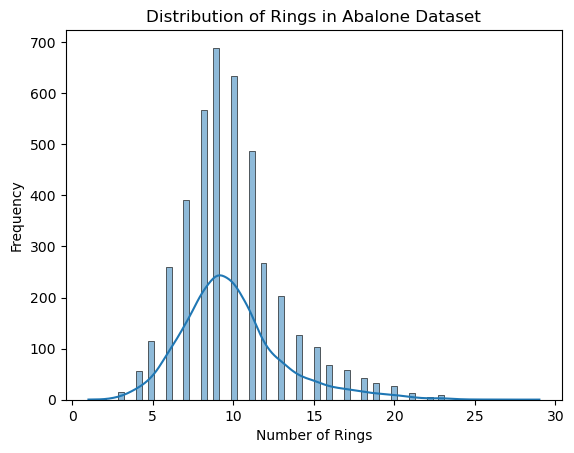

In [12]:
#regression
sns.histplot(df['Rings'], kde=True)
plt.title('Distribution of Rings in Abalone Dataset')
plt.xlabel('Number of Rings')
plt.ylabel('Frequency')
plt.show()


$\textbf{TASK: Take 10 moderately sized subsamples and create a pairplot of the feature variable in relation to the target variable}$

<Figure size 5000x4000 with 0 Axes>

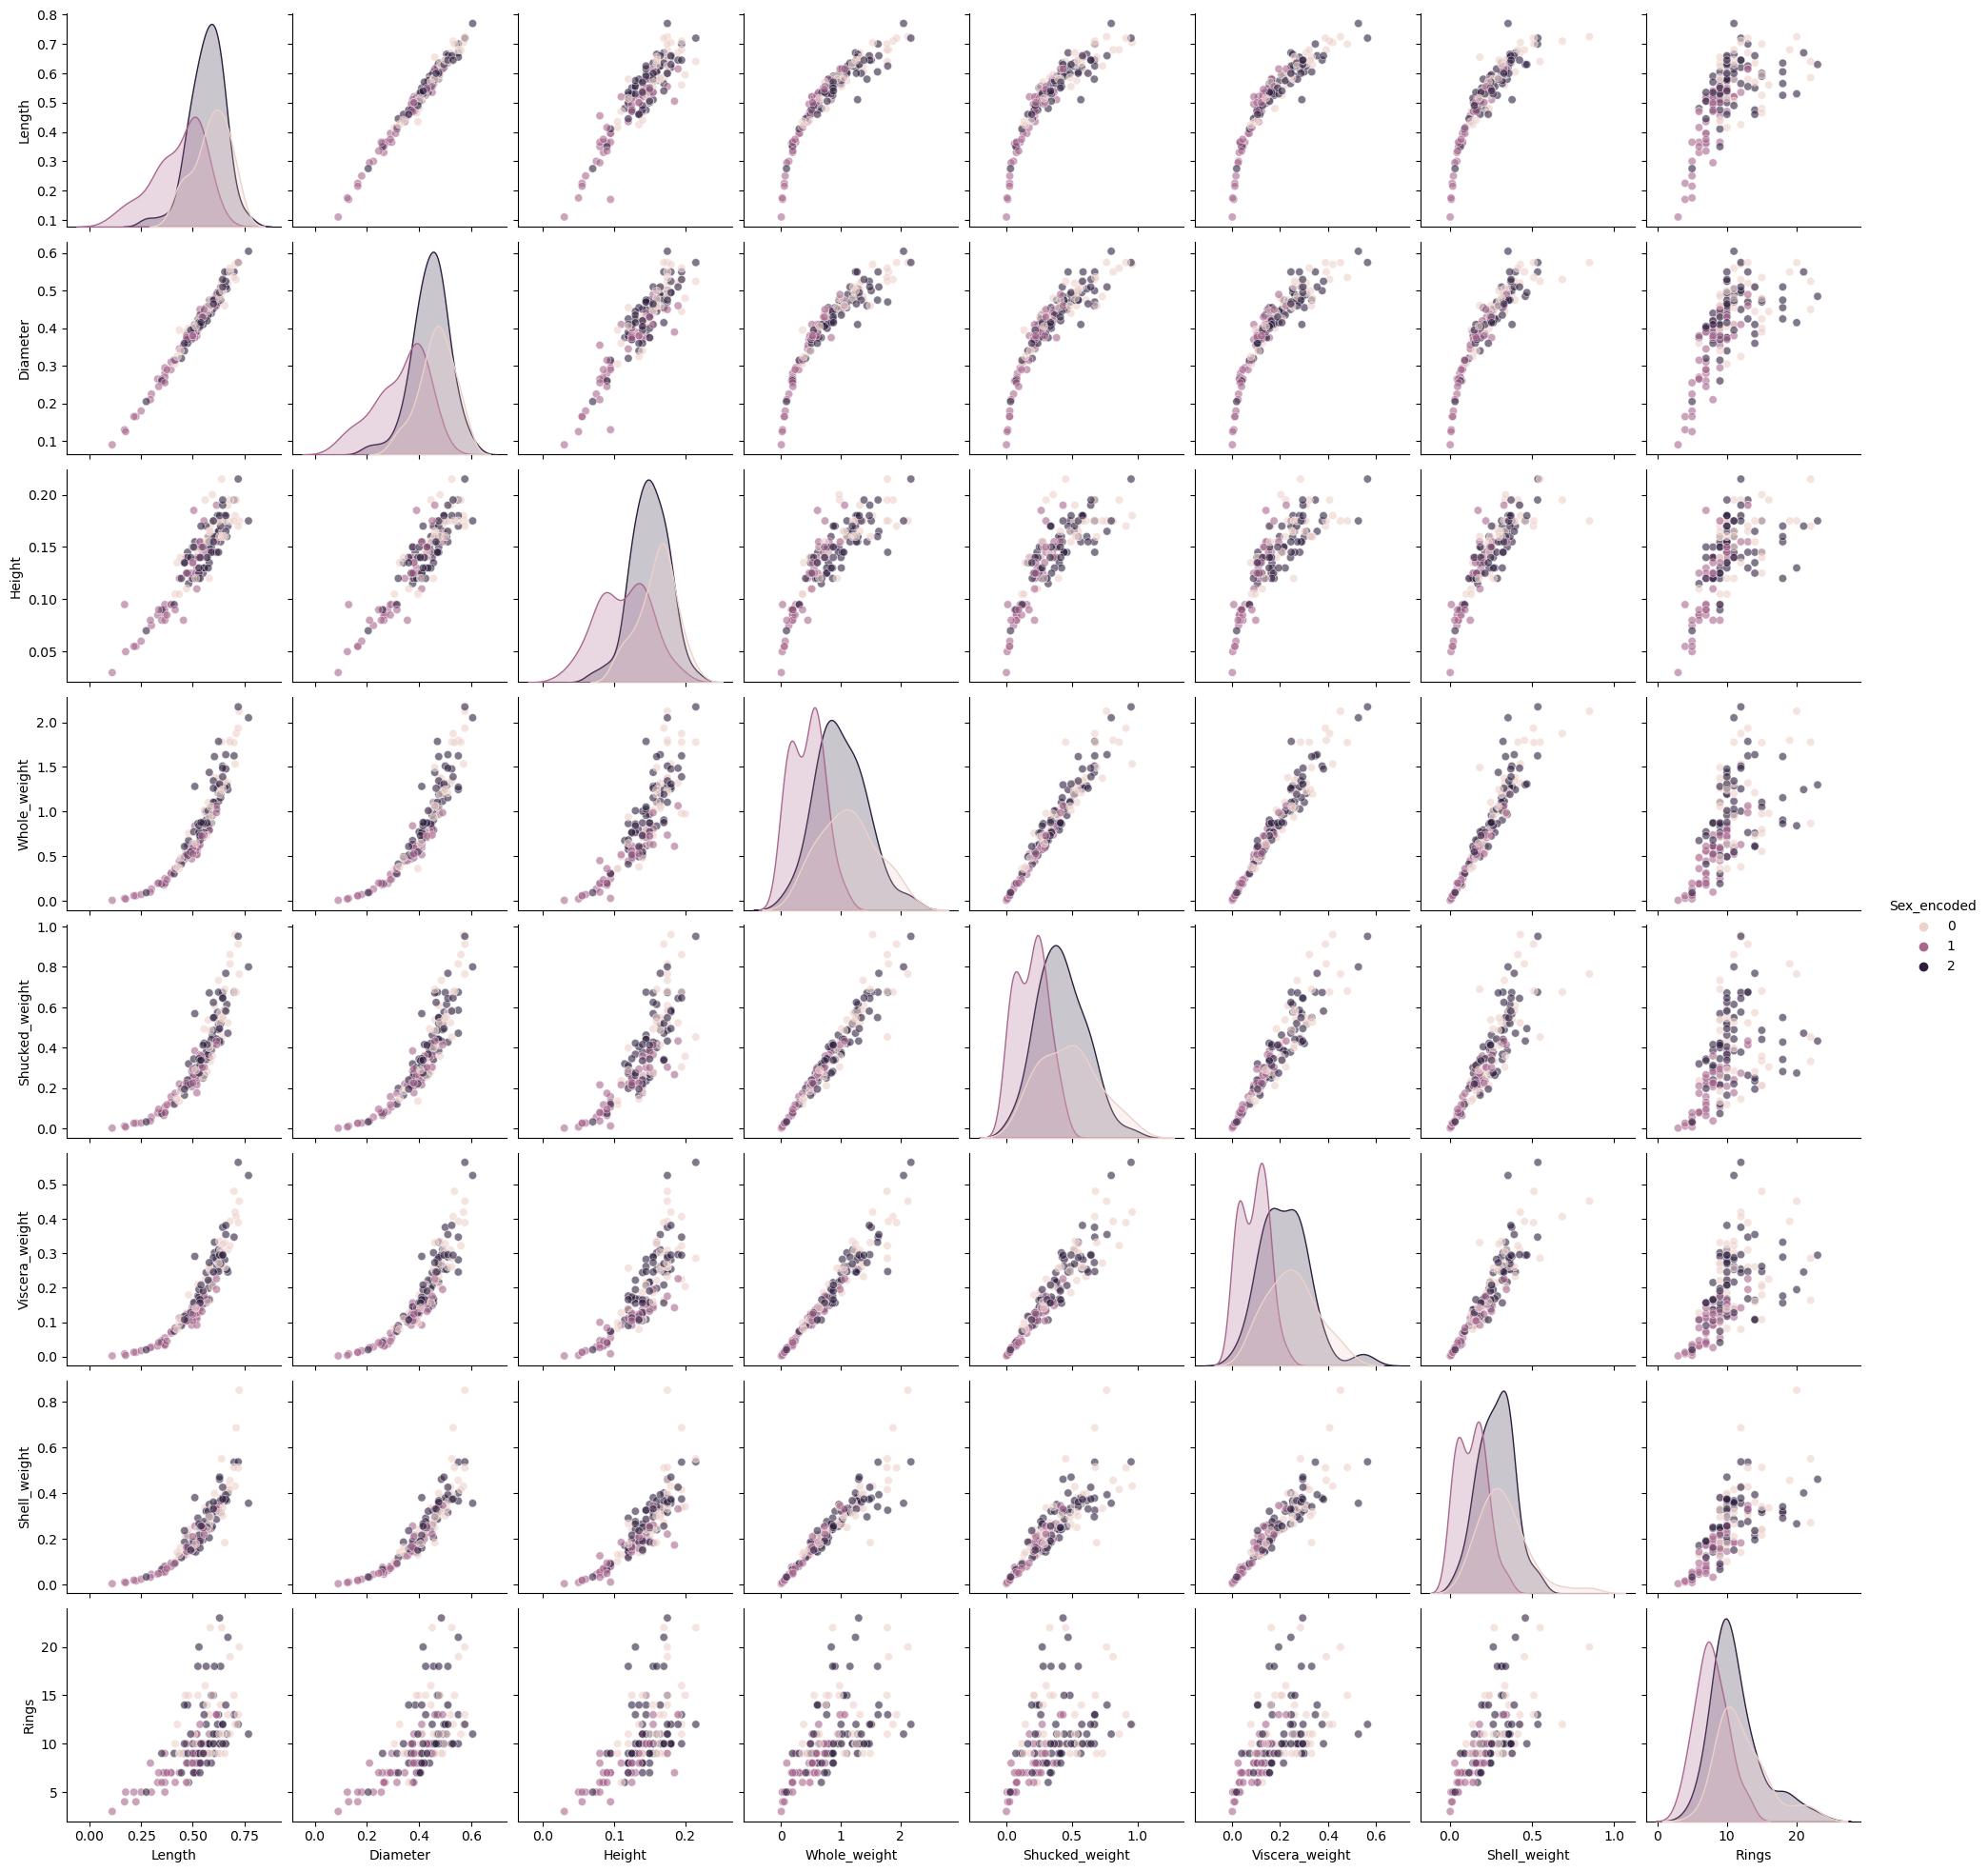

In [32]:
#warnings about FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. 
#Convert inf values to NaN before operating instead. - blocking figures
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module="pandas.core.common")
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")


# Generate a pairplot for a subsample with increased plot size
subsample = df.sample(n=150, random_state=42)  # taking a subsample of 150 instances
plt.figure(figsize=(50, 40))
pair_plot = sns.pairplot(subsample, hue='Sex_encoded', vars=[col for col in df.columns if col != 'Sex_encoded'], plot_kws={'alpha': 0.6})
plt.show()


$\textbf{TASK: Create a clustermap with seaborn to explore the relationships between variables.}$

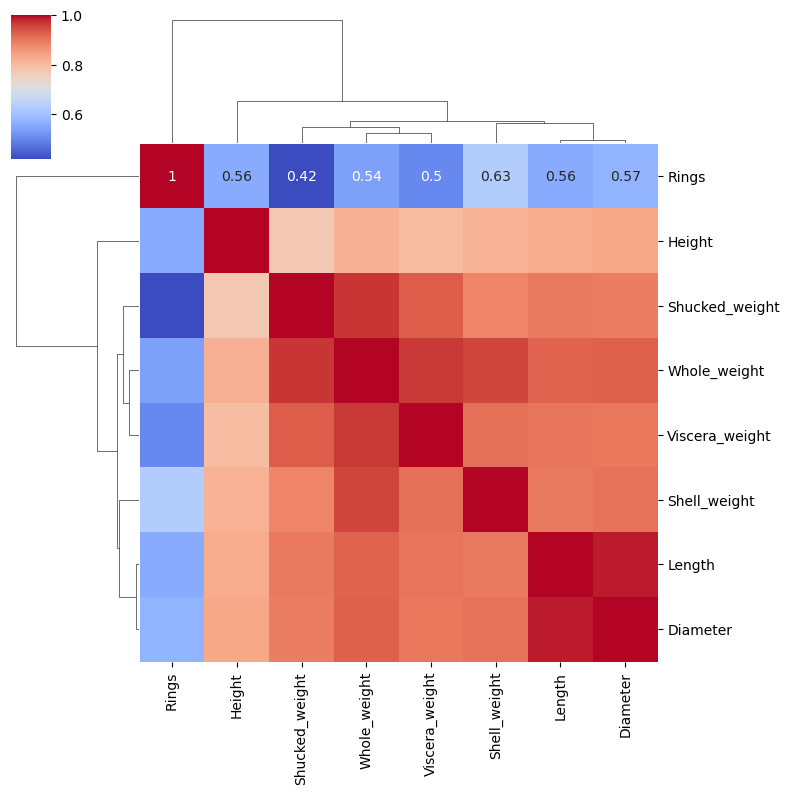

In [22]:
# Clustermap of the whole dataset
sns.clustermap(df.drop('Sex_encoded', axis=1).corr(), cmap='coolwarm', annot=True, figsize=(8, 8))
plt.show()


$\textbf{ASK: Perform SVM modelling and check the performance of your model, improve the performance of your model using grdisearch}$

In [23]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Split data into features and labels
X = df.drop('Rings', axis=1)
y = df['Rings']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with scaler and SVR
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# Define the parameters for GridSearch
param_grid = {'svr__C': [0.1, 1, 10], 'svr__gamma': ['scale', 'auto'], 'svr__kernel': ['rbf', 'linear']}

# Perform GridSearch
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid.fit(X_train, y_train)

# Best parameters and model performance
print("Best parameters:", grid.best_params_)
print("Best CV Score:", -grid.best_score_)

# Predict on test data
y_pred = grid.predict(X_test)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ......svr__C=0.1, svr__gamma=scale, svr__kernel=rbf; total time=   0.6s
[CV] END ......svr__C=0.1, svr__gamma=scale, svr__kernel=rbf; total time=   0.5s
[CV] END ......svr__C=0.1, svr__gamma=scale, svr__kernel=rbf; total time=   0.6s
[CV] END ......svr__C=0.1, svr__gamma=scale, svr__kernel=rbf; total time=   0.5s
[CV] END ......svr__C=0.1, svr__gamma=scale, svr__kernel=rbf; total time=   0.5s
[CV] END ...svr__C=0.1, svr__gamma=scale, svr__kernel=linear; total time=   0.3s
[CV] END ...svr__C=0.1, svr__gamma=scale, svr__kernel=linear; total time=   0.3s
[CV] END ...svr__C=0.1, svr__gamma=scale, svr__kernel=linear; total time=   0.3s
[CV] END ...svr__C=0.1, svr__gamma=scale, svr__kernel=linear; total time=   0.4s
[CV] END ...svr__C=0.1, svr__gamma=scale, svr__kernel=linear; total time=   0.3s
[CV] END .......svr__C=0.1, svr__gamma=auto, svr__kernel=rbf; total time=   0.5s
[CV] END .......svr__C=0.1, svr__gamma=auto, svr